# Risk Assignment 
### Author Andre Hoarau
<p align="center">
<img src ="https://i2.pickpik.com/photos/192/49/172/risk-word-letters-boggle-preview.jpg"
</p>

The task is to simulate 1000 individual battle rounds in risk with 3 attackers and 2 defenders and plot the results.
The rules:
    In Risk one army fights another. (using 6 sided dice)

    In each battle round, the attacker can put forward up to three of their troops (3 dice).

    The defender can use up to two of their defending troops (2 dice).

    Each side looses troops depending on the following rules:

    The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
    The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)

In [3]:
# Lets import the packages we will use.
import numpy as np
import matplotlib.pyplot as plt
# Lets make an array for the attacker roll.
attack_roll = np.random.randint(1,7, size= [1000,3],)
# Similarily we can make an array for the defender roll
defend_roll = np.random.randint(1,7, size= [1000,2])
'''print (attack_roll[:20]) 
print (defend_roll[:20])'''

'print (attack_roll[:20]) \nprint (defend_roll[:20])'

In [ ]:
# I was hoping to use this later on in the more complicated scenario but realised that this relies on the same number of rounds.
def calculate_losses(attack_roll, defend_roll):
    # Now I need to compare the 2 arrays and determine the results
    max_attack_value1= np.max(attack_roll, axis= 1)
    # Sorted each row in the array in descending order as I have done below and selected the first and second elements.
    max_attack_value2 = np.sort(attack_roll,axis=1)[:,-2]
    # We can replicate for the defender rolls
    max_defend_value1 =  np.max(defend_roll, axis= 1)
    max_defend_value2 = np.sort(defend_roll,axis=1)[:,-2]
    # We then need to determine what dice rolls are winning.
    attack_loses1 = (max_attack_value1 <= max_defend_value1).astype(int)
    defend_loses1 = (max_attack_value1 > max_defend_value1).astype(int)
    attack_loses2 = (max_attack_value2 <= max_defend_value2).astype(int)
    defend_loses2 = (max_attack_value2 > max_defend_value2).astype(int)
    # Sum up the losses for each row
    attack_loses_per_row = attack_loses1 + attack_loses2
    defend_loses_per_row = defend_loses1 + defend_loses2
    
    return attack_loses_per_row, defend_loses_per_row

attack_loses_per_row, defend_loses_per_row = calculate_losses(attack_roll, defend_roll)

# Print results for each row
for i in range(len(attack_loses_per_row)):
    print(f"Row {i + 1}: Attack Loses = {attack_loses_per_row[i]}, Defend Loses = {defend_loses_per_row[i]}")



Row 1: Attack Loses = 0, Defend Loses = 2
Row 2: Attack Loses = 0, Defend Loses = 2
Row 3: Attack Loses = 1, Defend Loses = 1
Row 4: Attack Loses = 2, Defend Loses = 0
Row 5: Attack Loses = 0, Defend Loses = 2
Row 6: Attack Loses = 0, Defend Loses = 2
Row 7: Attack Loses = 0, Defend Loses = 2
Row 8: Attack Loses = 2, Defend Loses = 0
Row 9: Attack Loses = 2, Defend Loses = 0
Row 10: Attack Loses = 2, Defend Loses = 0
Row 11: Attack Loses = 0, Defend Loses = 2
Row 12: Attack Loses = 0, Defend Loses = 2
Row 13: Attack Loses = 0, Defend Loses = 2
Row 14: Attack Loses = 0, Defend Loses = 2
Row 15: Attack Loses = 2, Defend Loses = 0
Row 16: Attack Loses = 1, Defend Loses = 1
Row 17: Attack Loses = 2, Defend Loses = 0
Row 18: Attack Loses = 0, Defend Loses = 2
Row 19: Attack Loses = 0, Defend Loses = 2
Row 20: Attack Loses = 0, Defend Loses = 2
Row 21: Attack Loses = 2, Defend Loses = 0
Row 22: Attack Loses = 0, Defend Loses = 2
Row 23: Attack Loses = 0, Defend Loses = 2
Row 24: Attack Loses

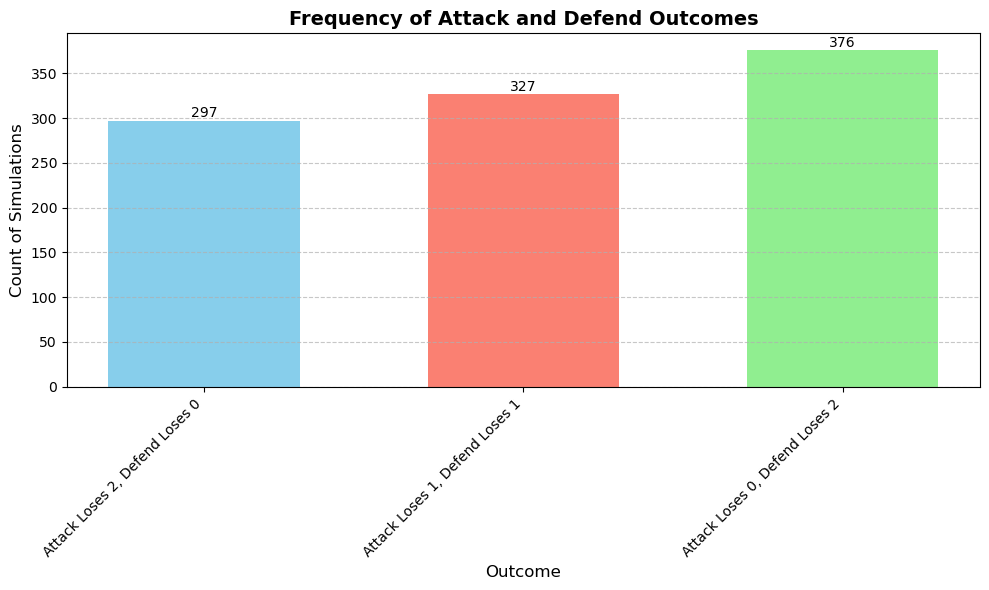

In [10]:
import matplotlib.pyplot as plt
import numpy as np

count_attack_0_defend_2 = 0
count_attack_1_defend_1 = 0
count_attack_2_defend_0 = 0

for loses in attack_loses_per_row:
    if loses == 0:
        count_attack_0_defend_2 += 1
    elif loses == 1:
        count_attack_1_defend_1 += 1
    elif loses == 2:
        count_attack_2_defend_0 += 1

# Data
outcomes = ['Attack Loses 2, Defend Loses 0', 'Attack Loses 1, Defend Loses 1', 'Attack Loses 0, Defend Loses 2']
counts = [count_attack_2_defend_0, count_attack_1_defend_1, count_attack_0_defend_2]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(outcomes, counts, color=['skyblue', 'salmon', 'lightgreen'], width=0.6)

# Enhancements
plt.title('Frequency of Attack and Defend Outcomes', fontsize=14, fontweight='bold')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count of Simulations', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


# The more complicated version
## This is going to take values of armies of arbitrary sizes and continue until one is wiped out and then plot those results.

In [ ]:
# First we will generate our attack and defend army sizes.
attack_army_size = np.random.randint(1,1001)
defend_army_size = np.random.randint(1,1001)    
print(f"The attack army size is {attack_army_size} and the defend army size is {defend_army_size}")

The attack army size is 380 and the defend army size is 784


Round 1: Attacker Army Size = 380, Defender Army Size = 784
Round 2: Attacker Army Size = 378, Defender Army Size = 784
Round 3: Attacker Army Size = 377, Defender Army Size = 783
Round 4: Attacker Army Size = 376, Defender Army Size = 782
Round 5: Attacker Army Size = 374, Defender Army Size = 782
Round 6: Attacker Army Size = 372, Defender Army Size = 782
Round 7: Attacker Army Size = 372, Defender Army Size = 780
Round 8: Attacker Army Size = 371, Defender Army Size = 779
Round 9: Attacker Army Size = 369, Defender Army Size = 779
Round 10: Attacker Army Size = 369, Defender Army Size = 777
Round 11: Attacker Army Size = 368, Defender Army Size = 776
Round 12: Attacker Army Size = 367, Defender Army Size = 775
Round 13: Attacker Army Size = 365, Defender Army Size = 775
Round 14: Attacker Army Size = 363, Defender Army Size = 775
Round 15: Attacker Army Size = 362, Defender Army Size = 774
Round 16: Attacker Army Size = 362, Defender Army Size = 772
Round 17: Attacker Army Size = 36

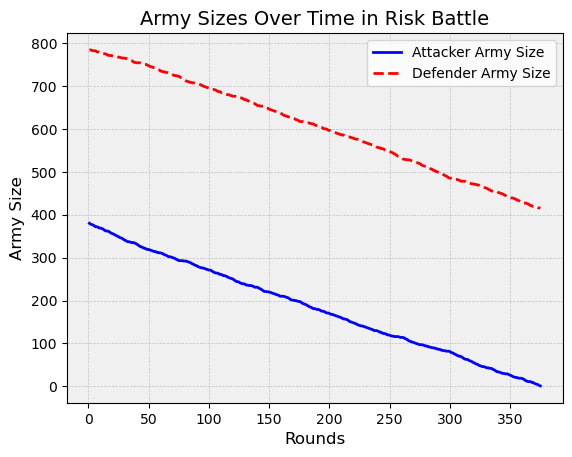

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store army sizes per round
rounds_list = []
attack_army_sizes = []
defend_army_sizes = []

rounds = 0
while attack_army_size > 0 and defend_army_size > 0:
    rounds += 1
    rounds_list.append(rounds)
    attack_army_sizes.append(attack_army_size)
    defend_army_sizes.append(defend_army_size)

    print(f"Round {rounds}: Attacker Army Size = {attack_army_size}, Defender Army Size = {defend_army_size}")
    
    attack_dice = min(3, attack_army_size)
    defend_dice = min(2, defend_army_size)
    
    attack_roll2 = np.random.randint(1, 7, size=(min(attack_army_size, defend_army_size), attack_dice))
    defend_roll2 = np.random.randint(1, 7, size=(min(attack_army_size, defend_army_size), defend_dice))

    attack_army_loss = 0
    defend_army_loss = 0

    # Sort each row in descending order
    attack_roll2 = np.sort(attack_roll2, axis=1)[:, ::-1]
    defend_roll2 = np.sort(defend_roll2, axis=1)[:, ::-1]

    for i in range(min(attack_dice, defend_dice)):
        if attack_roll2[i, 0] > defend_roll2[i, 0]:
            defend_army_loss += 1
        else:
            attack_army_loss += 1

    attack_army_size -= attack_army_loss
    defend_army_size -= defend_army_loss

    # Ensure army sizes don't go below zero
    attack_army_size = max(attack_army_size, 0)
    defend_army_size = max(defend_army_size, 0)

# Outcome
if attack_army_size > 0:
    print(f"The attacker won in {rounds} rounds.")
else:
    print(f"The defender won in {rounds} rounds.")

# Plotting the army sizes with enhanced formatting
plt.plot(rounds_list, attack_army_sizes, label="Attacker Army Size", color='blue', linestyle='-', linewidth=2)
plt.plot(rounds_list, defend_army_sizes, label="Defender Army Size", color='red', linestyle='--', linewidth=2)
plt.xlabel('Rounds', fontsize=12)
plt.ylabel('Army Size', fontsize=12)
plt.title('Army Sizes Over Time in Risk Battle', fontsize=14)
plt.legend(loc='upper right', fontsize=10)

# Adding gridlines and background color
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')

# Display the plot
plt.show()


NOTE TO ANDRE FOR FUTURE DO THE EXTRA BIT IN THE ASSIGNMENT FOR LOSING TROOPS 
ALSO ADD SOME NOTES ABOUT HOW IT COMPARES TO STATISTICS AS IT SEEMS QUITE COOL.

Resources: 
* [https://stackoverflow.com/questions/12090472/how-do-i-center-an-image-in-the-readme-md-file-on-github-](https://stackoverflow.com/questions/12090472/how-do-i-center-an-image-in-the-readme-md-file-on-github) - Stackoverflow article on how to put in an image and centre it in markdown.
* [best way to loop through randomly generated array](https://stackoverflow.com/questions/69731158/best-way-to-loop-through-randomly-generated-array) - Stackoverflow article on how to generate the arrays 
* [NumPy: Compare two arrays element-wise]( https://note.nkmk.me/en/python-numpy-ndarray-compare/)- Chat GPT helped direct me to the element wise comparisons notes are also available here.

# End